## First Models

In this notebook all I really want to do is see if all the custom functions written before work and transform the dataset seamlessly or not. Then try out a few basic classification models and see if they work at all for ternary classification.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs

In [5]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()

In [6]:
X_train, encoders = pfs.ohe_all_categorical_features(X_train)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
#lr = LogisticRegression(random_state= 2020, max_iter=1000)
#fsm = lr.fit(X_train, y_train)

Need to fix these but moving along for now....

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [10]:
#confusion_matrix(y_train, fsm.predict(X_train))

In [11]:
#plot_confusion_matrix(fsm, X_train, y_train, cmap='Blues');

**Yikes that doesn't work at all**

#### DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
fsm2 = dt.fit(X_train, y_train)
confusion_matrix(y_train, fsm2.predict(X_train), normalize='true')

array([[0.98024661, 0.0049899 , 0.0147635 ],
       [0.18736177, 0.77030016, 0.04233807],
       [0.07096172, 0.00606909, 0.92296919]])

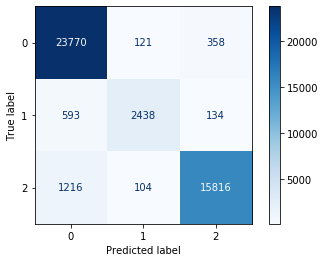

In [13]:
plot_confusion_matrix(fsm2, X_train, y_train, cmap='Blues', values_format='d');

In [14]:
print(classification_report(y_train, fsm2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     24249
           1       0.92      0.77      0.84      3165
           2       0.97      0.92      0.95     17136

    accuracy                           0.94     44550
   macro avg       0.94      0.89      0.91     44550
weighted avg       0.94      0.94      0.94     44550



In [15]:
fsm2.score(X_train, y_train)

0.9432996632996633

In [21]:
imp_feats = fsm2.feature_importances_
column_names = X_train.columns
list(zip(column_names, imp_feats))

[('amount_tsh', 0.03369635196024298),
 ('gps_height', 0.15540103556389256),
 ('population', 0.07672178391344739),
 ('construction_year', 0.07302790222541795),
 ('Internal', 0.002818012103915126),
 ('Lake Nyasa', 0.0025279648598688087),
 ('Lake Rukwa', 0.001107506070229779),
 ('Lake Tanganyika', 0.003105869441847515),
 ('Lake Victoria', 0.0015128813543693151),
 ('Pangani', 0.002185620910859624),
 ('Rufiji', 0.002666237345875272),
 ('Ruvuma / Southern Coast', 0.0016100242694636617),
 ('Wami / Ruvu', 0.0044702999436997655),
 ('Arusha', 0.0010441652271387678),
 ('Dar es Salaam', 0.0),
 ('Dodoma', 0.002595080593302458),
 ('Iringa', 0.001207106385421259),
 ('Kagera', 0.00018425985396768298),
 ('Kigoma', 0.002287403955901744),
 ('Kilimanjaro', 0.0016143095803248606),
 ('Lindi', 0.0010193288351205362),
 ('Manyara', 0.0005229678005694013),
 ('Mara', 0.002792933227898155),
 ('Mbeya', 0.0005130104363695776),
 ('Morogoro', 0.004922147873772293),
 ('Mtwara', 0.0006685440248926452),
 ('Mwanza', 0.00

#### Much better, long way to go still

### Next Steps:
* Read up ensemble methods
* Class imbalance - figure out how to fix that

In [16]:
y_train.target.value_counts(normalize=True)

0    0.544310
2    0.384646
1    0.071044
Name: target, dtype: float64

In [17]:
y_test.target.value_counts(normalize=True)

0    0.539394
2    0.383030
1    0.077576
Name: target, dtype: float64

In [22]:
X_train.shape

(44550, 303)